# PCA from scratch by using NumPy

In [1]:
import numpy as np

In [2]:
np.random.seed(42546165) # random seed for consistency

In [3]:
#We have already standardised the data by having same mean for all three features, otherwise
#we need to standardise data before performing PCA
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
#This generates data when given an average and a covariance matrix. 
#we are creating a 3 cross 20 feature points
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

In [4]:
class1_sample

array([[-0.60738889, -1.22355841, -1.77228055],
       [ 0.33185089,  0.73521712, -0.02153467],
       [ 0.43996144,  1.63948756, -0.37924818],
       [ 0.10098321,  1.03196279,  0.36157621],
       [ 0.24208204, -1.44151948, -0.28511064],
       [ 0.37574261, -1.86819849, -0.93196477],
       [ 0.17789756,  0.56049505,  0.71708948],
       [ 1.38686771, -0.15878753,  0.81725739],
       [-0.5895378 ,  1.28912061,  0.1499517 ],
       [ 1.187692  ,  0.69491174,  0.22822614],
       [-0.32522548, -0.21691842,  0.59869304],
       [ 0.52331137,  0.54451356, -1.43750096],
       [-0.95596413,  0.66036901,  1.16759312],
       [ 0.31119676,  0.74214592, -0.48399727],
       [-1.2832756 , -0.53856438, -0.1682562 ],
       [ 0.3258172 , -1.53619999, -0.43142387],
       [ 0.54802963, -0.38334476, -0.1182551 ],
       [ 1.16867693,  0.26309353,  0.55337631],
       [ 0.62871102, -0.06652395, -0.78273245],
       [ 0.90002708,  0.55516777, -0.11973888]])

In [5]:
#We will take transpose of the above in order to perform matrix calculations, the covariance
#numpy function calculates variance between rows so thats why we have changed the axis
class1_sample = class1_sample.T
class1_sample

array([[-0.60738889,  0.33185089,  0.43996144,  0.10098321,  0.24208204,
         0.37574261,  0.17789756,  1.38686771, -0.5895378 ,  1.187692  ,
        -0.32522548,  0.52331137, -0.95596413,  0.31119676, -1.2832756 ,
         0.3258172 ,  0.54802963,  1.16867693,  0.62871102,  0.90002708],
       [-1.22355841,  0.73521712,  1.63948756,  1.03196279, -1.44151948,
        -1.86819849,  0.56049505, -0.15878753,  1.28912061,  0.69491174,
        -0.21691842,  0.54451356,  0.66036901,  0.74214592, -0.53856438,
        -1.53619999, -0.38334476,  0.26309353, -0.06652395,  0.55516777],
       [-1.77228055, -0.02153467, -0.37924818,  0.36157621, -0.28511064,
        -0.93196477,  0.71708948,  0.81725739,  0.1499517 ,  0.22822614,
         0.59869304, -1.43750096,  1.16759312, -0.48399727, -0.1682562 ,
        -0.43142387, -0.1182551 ,  0.55337631, -0.78273245, -0.11973888]])

In [6]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [7]:
class2_sample

array([[ 0.98278251,  0.3371539 ,  2.20243593,  0.87175094,  2.35221005,
         0.43659248,  0.53084606,  0.24158666,  0.79184457,  0.20276424,
         1.69970292,  0.76988928, -0.03135048,  2.24840672,  1.33099868,
         3.05833656,  0.97775247, -0.61075869,  1.71970254, -0.43578257],
       [ 0.30145317,  2.14532809,  0.60297792,  1.08738087,  2.15513869,
         0.61501909,  2.00521171,  0.34346901,  0.51162218, -0.29878475,
         0.61150655,  2.42868217,  0.97517033, -0.43283204,  1.07218465,
         1.48754344,  0.71449045, -0.97959592,  0.83929424,  2.21007672],
       [-0.81175952,  0.20506754,  0.44547465,  2.40785806,  0.34894767,
         0.21238815,  0.95397658,  1.00808563,  0.90582413, -0.24958993,
         2.05269574,  1.73303195,  0.83453996,  0.29447913,  1.42519348,
         0.50251391,  0.93466988,  1.65985269,  0.57494523,  1.78227342]])

In [8]:
#Our data is devided into two classes with 20 as number of samples and 3 features.

Populating the interactive namespace from numpy and matplotlib


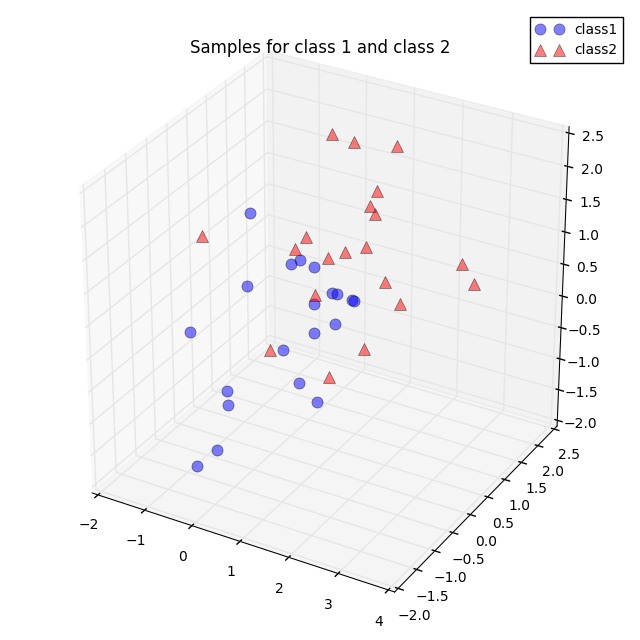

In [9]:
#Plotting our classes on a 3D map. We will reduce this from 3D to 2D finally.
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [10]:
#Taking all samples together
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [11]:
#Calculating the mean of all features across each axis
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.61410801]
 [ 0.49195515]
 [ 0.37205471]]


In [12]:
#Calculating the covariance matrix, 
#we have not used mean in this as it is already done by numpy
# Should make students calculate covariance by own using formulae?
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
cov_mat

array([[ 0.84837837,  0.23352411,  0.11165559],
       [ 0.23352411,  1.08346766,  0.42152195],
       [ 0.11165559,  0.42152195,  0.82980585]])

In [13]:
#This function gives eigenvalues and vectors for a given matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
eig_vec_cov #we have recieved a 3 cross 3 matrix but we need to reshape this as we had
#calculated for transpose of our original data

array([[ 0.36596654,  0.91270727,  0.18175239],
       [ 0.75778646, -0.17889047, -0.62750131],
       [ 0.54021123, -0.36737398,  0.75710513]])

In [14]:
eig_val_cov

array([ 1.49674095,  0.75766517,  0.50724576])

In [15]:

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T #reshaping the first column as the first row 
    #as that represents our actual vector and not the original first row

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

Eigenvector 1: 
[[ 0.36596654]
 [ 0.75778646]
 [ 0.54021123]]
Eigenvalue 1 from covariance matrix: 1.4967409485301824
----------------------------------------
Eigenvector 2: 
[[ 0.91270727]
 [-0.17889047]
 [-0.36737398]]
Eigenvalue 2 from covariance matrix: 0.7576651685501954
----------------------------------------
Eigenvector 3: 
[[ 0.18175239]
 [-0.62750131]
 [ 0.75710513]]
Eigenvalue 3 from covariance matrix: 0.507245755845286
----------------------------------------


Populating the interactive namespace from numpy and matplotlib


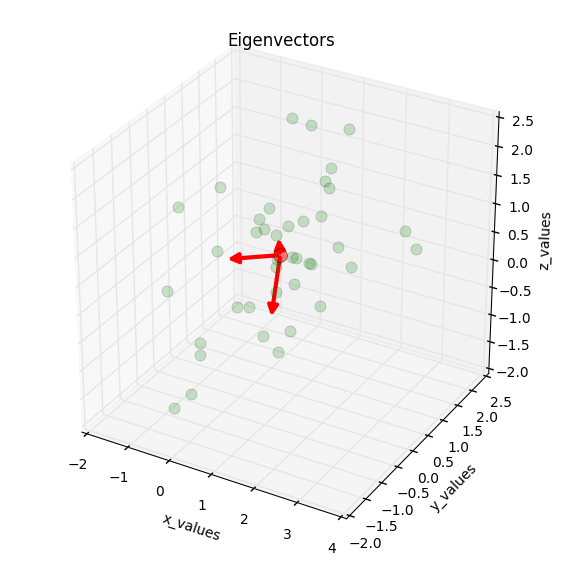

In [16]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()


In [17]:
#Creating a list with values and vector pairs

In [22]:
eig_cov_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

eig_cov_pairs.sort(key=lambda x:x[0], reverse = True) #Sorting based on first key in 
                                                        #descending order

eig_cov_pairs

[(1.4967409485301824, array([ 0.36596654,  0.75778646,  0.54021123])),
 (0.75766516855019539, array([ 0.91270727, -0.17889047, -0.36737398])),
 (0.50724575584528597, array([ 0.18175239, -0.62750131,  0.75710513]))]

In [23]:
#Constructing the Weight matrix by picking the two vectors with max values
#We are picking 2 out of the three in order to transform from 3D to 2D

matrix_W = np.hstack((eig_cov_pairs[0][1].reshape(3,1), eig_cov_pairs[1][1].reshape(3,1)))

matrix_W

array([[ 0.36596654,  0.91270727],
       [ 0.75778646, -0.17889047],
       [ 0.54021123, -0.36737398]])

In [24]:
#Now we need to transform the original space into the new one 
# It is given by formulae y = W (transform) * X

transformed = matrix_W.T.dot(all_samples)
transformed.shape #Should be changed to 2 cross 40 matrix with 
                    #original 40 points in 2 dimension

(2, 40)

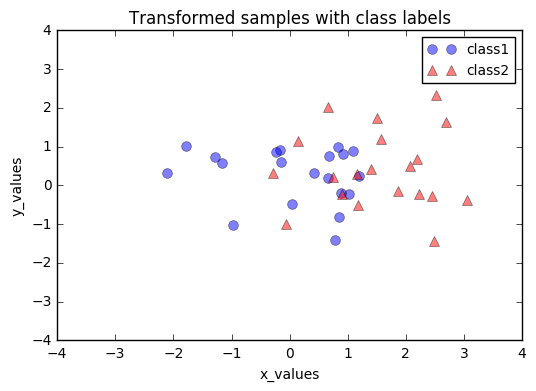

In [25]:
#Plotting the new points
#Can ask students to do this part.
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


# Trying the same transformation using scikit's inbuilt PCA and comparing results

In [27]:
from sklearn.decomposition import PCA 

In [28]:
sklearn_pca = PCA(n_components=2) #Choosing 2 as the new dimension

sklearn_transformed = sklearn_pca.fit_transform(all_samples.T)

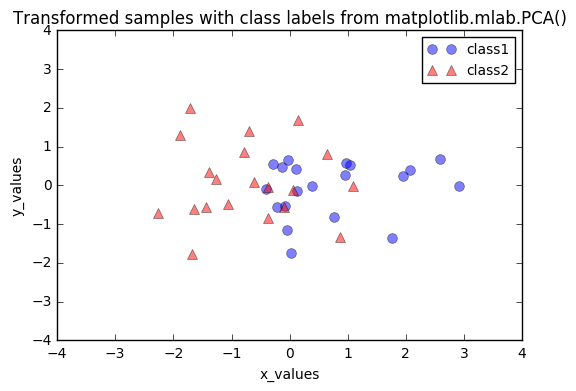

In [30]:
#Plotting the new values

plt.plot(sklearn_transformed[0:20,0],sklearn_transformed[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transformed[20:40,0], sklearn_transformed[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()


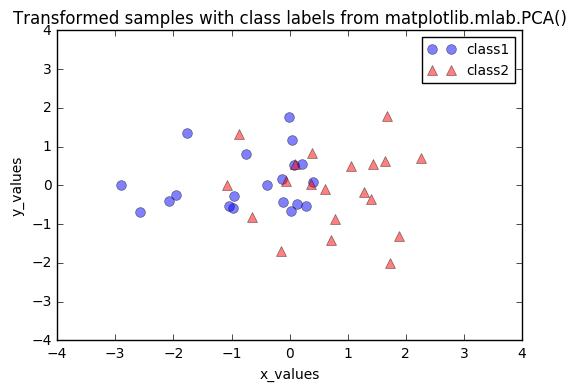

In [31]:
#The matrix obtained is a mirror image of ours, this is due to the eigen vectors
#being negative of those obtained from ours, get them printed if possible. 

#Multiply by -1 to obtain the original graph

sklearn_transformed_mirror = sklearn_transformed * (-1)
plt.plot(sklearn_transformed_mirror[0:20,0],sklearn_transformed_mirror[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transformed_mirror[20:40,0], sklearn_transformed_mirror[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()


In [32]:
#Still the center of our is off and not arround 0, can be rectified by performing 
# transformed = matrix_W.T.dot(all_samples - mean)
#Can ask students to do this and plot.
transformed_centered = matrix_W.T.dot(all_samples - mean_vector)

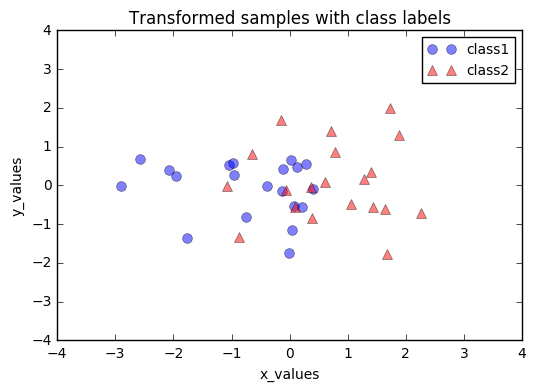

In [33]:
plt.plot(transformed_centered[0,0:20], transformed_centered[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed_centered[0,20:40], transformed_centered[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


In [34]:
#Results are almost same, not exact...? check, probably due to floating point calculations